# **Importing Libraries**

In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Preprocessing**

In [21]:
training_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/My Drive/Colab Notebooks/Tom_and_Jerry',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=123
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/My Drive/Colab Notebooks/Tom_and_Jerry',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 3170 files belonging to 2 classes.
Using 2536 files for training.
Found 3170 files belonging to 2 classes.
Using 634 files for validation.


# **Normalisation**

In [22]:
# Scale pixel values between 0 and 1
def normalize_image(image, label):
    image = image / 255.0
    return image, label

# Apply normalization to both datasets
training_ds = training_ds.map(normalize_image)
validation_ds = validation_ds.map(normalize_image)

In [24]:
# Verifying shape and scaling
for images, labels in training_ds.take(1):
    # Check shape of the batch
    print("Batch shape:", images.shape)   #channels — Red, Green, and Blue (RGB)
    print("Label shape:", labels.shape)

Batch shape: (32, 256, 256, 3)
Label shape: (32,)


In [27]:
for images, labels in training_ds.take(1):
    print("Min pixel value:", tf.reduce_min(images).numpy())
    print("Max pixel value:", tf.reduce_max(images).numpy())

Min pixel value: 0.0
Max pixel value: 1.0


## **Create Model**

In [29]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(256, 256, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [31]:
something = model.fit(training_ds, batch_size=32, epochs=100, validation_data=validation_ds)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 608s 8s/step - accuracy: 0.6366 - loss: 2.5933 - val_accuracy: 0.8028 - val_loss: 0.4404
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 204ms/step - accuracy: 0.8373 - loss: 0.3813 - val_accuracy: 0.8801 - val_loss: 0.3052
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.9148 - loss: 0.2112 - val_accuracy: 0.9006 - val_loss: 0.2504
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.9570 - loss: 0.1203 - val_accuracy: 0.9069 - val_loss: 0.2325
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 181ms/step - accuracy: 0.9902 - loss: 0.0473 - val_accuracy: 0.9101 - val_loss: 0.2599
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - accuracy: 0.9914 - loss: 0.0367 - val_accuracy: 0.9022 - val_loss: 0.2913
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.9972 - loss: 0.0173 - val_accuracy: 0.9038 - val_loss: 0.3331
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 218ms/step - accuracy: 0.9992 - loss: 0.0095 - va

# **visualisation**

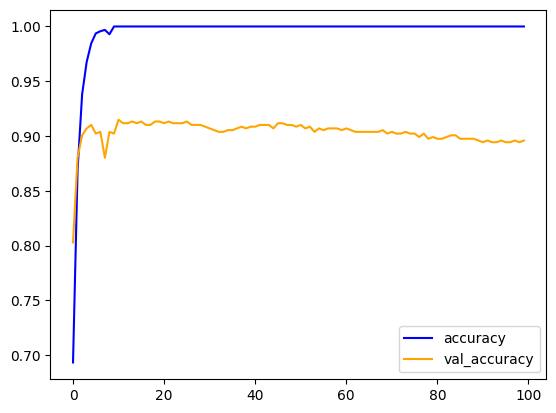

In [58]:
plt.plot(something.history['accuracy'],color = 'blue', label='accuracy')
plt.plot(something.history['val_accuracy'],color = 'orange', label = 'val_accuracy')
plt.legend()
plt.show()

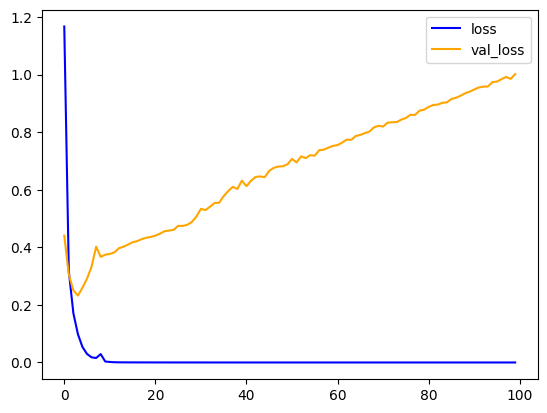

In [59]:
plt.plot(something.history['loss'],color = 'blue', label='loss')
plt.plot(something.history['val_loss'],color = 'orange', label = 'val_loss')
plt.legend()
plt.show()

# **Evaluation**

In [33]:
evaluation = model.evaluate(validation_ds)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.9087 - loss: 0.7536
Validation Loss: 1.0017797946929932
Validation Accuracy: 0.8958990573883057


In [34]:
import random

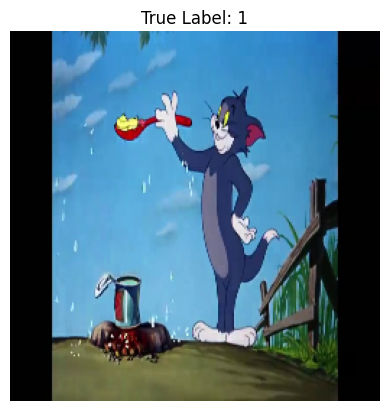

In [52]:
# Randomly select a batch index and an image index within that batch
batch_index = random.randint(0, tf.data.experimental.cardinality(validation_ds).numpy() - 1)
image_index = random.randint(0, 31)  # Assuming batch_size=32

# Extract the random image and label
for i, (images, labels) in enumerate(validation_ds):
    if i == batch_index:
        selected_image = images[image_index]
        selected_label = labels[image_index]
        break

# Display the image
plt.imshow(selected_image)
plt.title(f"True Label: {selected_label.numpy()}")
plt.axis('off')
plt.show()

In [53]:
# Get prediction
pred = model.predict(np.expand_dims(selected_image, axis=0))  # Add batch dimension
print("Prediction (probability):", pred[0][0])
print("Predicted Class (0 or 1):", 1 if pred[0][0] > 0.5 else 0)
print("The character is:", "Tom" if pred[0][0] > 0.5 else "Jerry")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction (probability): 1.0
Predicted Class (0 or 1): 1
The character is: Tom
